## Visualización COVID

Basado en el estudio de https://github.com/therealcyberlord

Analisis de los datos de la expansión del último coronavirus (SARS-CoV-2) llamado por la OMS oficialmente COVID-19, un virus respiratorio altamente contagioso que apareció en Wuhan en Diciembre del 2019. 

- Data: https://github.com/CSSEGISandData/COVID-19 Repositorio propiedad de Johns Hopkins..
- Enlace al artículo sobre el COVID-19 en la OMS  https://www.who.int/emergencies/diseases/novel-coronavirus-2019
- Enlace al artículo en el CDC https://www.cdc.gov/coronavirus/2019-ncov
- visualización de los datos con ARCGIS https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6

<img src='https://newsfortomorrow.com/wp-content/uploads/2020/01/1578562454_Wuhan-pneumonia-New-coronavirus-related-to-SARS-idenitified.jpg'>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates 
import pandas as pd 
import random
import math
import time
import datetime
import operator
plt.style.use('seaborn')
%matplotlib inline 

## Carga online de los datos
Los cargamos a partir del repositorio de Johns Hopkins en git

In [2]:
#confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,264,302,367,409,454,511,584,716,847,986
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,164,188,224,267,308,334,370,376,390,428
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,3,3,4,4,5,7,7,7,8,8


## Vista de Detalle
Gráficas con la evolución de contagios en un país específico, a seleccionar más abajo

In [4]:
 np.sort(confirmed_df["Country/Region"].unique())

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guine

### Poner aquí abajo el pais elegido de la lista de arriba

In [115]:
pais_elegido = "Spain"

pais_versus = "Italy"

In [116]:
# Me quedo con las fechas nada mas, de la columna 4 en adelante. Las usaré de pie de gráficos por claridad
cols = confirmed_df.columns
col_fechas_ind = cols[4:]

#las paso a fecha
x_values = [datetime.datetime.strptime(d,"%m/%d/%y").date() for d in col_fechas_ind.values]

In [117]:
# chequeo Pais
esp_confirmed = confirmed_df[confirmed_df["Country/Region"]==pais_elegido].groupby("Country/Region").sum().loc[:, col_fechas_ind]
esp_confirmed_y = esp_confirmed.values[0]

esp_total_deaths = deaths_df[deaths_df["Country/Region"]==pais_elegido].groupby("Country/Region").sum().loc[:, col_fechas_ind].values[0]
esp_total_recovery = recoveries_df[recoveries_df["Country/Region"]==pais_elegido].groupby("Country/Region").sum().loc[:, col_fechas_ind].values[0]

esp_outers = esp_total_deaths + esp_total_recovery
esp_occupancy = esp_confirmed_y - esp_outers



In [118]:


itl_confirmed = confirmed_df[confirmed_df["Country/Region"]==pais_versus].groupby("Country/Region").sum().loc[:, col_fechas_ind]
itl_confirmed_y = esp_confirmed.values[0]

iterador = list (itl_confirmed)
for i in iterador: 
    if itl_confirmed[i][0] != 0:
        itl_fecha_1er_infectado =  i
        break
print (itl_fecha_1er_infectado)

1/31/20


In [119]:
limpio2 = []
iterador = list (itl_confirmed)
for i in iterador: 
    if itl_confirmed[i][0] != 0:
        conf = itl_confirmed[i][0]
        limpio2.append (conf)
        

In [120]:
limpio1 = []
iterador = list (esp_confirmed)
for i in iterador: 
    if esp_confirmed[i][0] != 0:
        conf = esp_confirmed[i][0]
        limpio1.append (conf )

limpio2 = limpio2[:len(limpio1)]


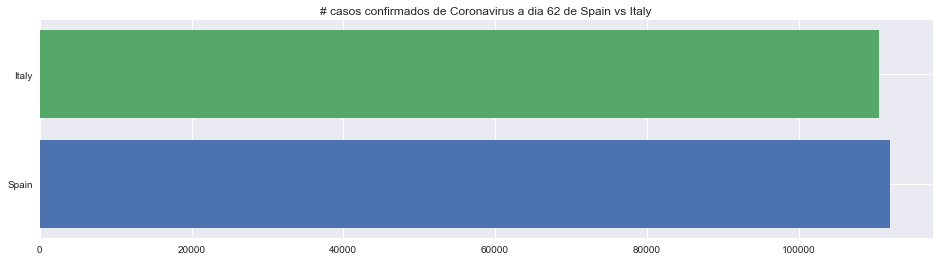

In [121]:
plt.figure(figsize=(16, 4))
plt.barh(pais_elegido, limpio1)
plt.barh(pais_versus, limpio2)
plt.title('# casos confirmados de Coronavirus a dia {} de {} vs {}'.format(len(limpio1), pais_elegido, pais_versus))
plt.show()

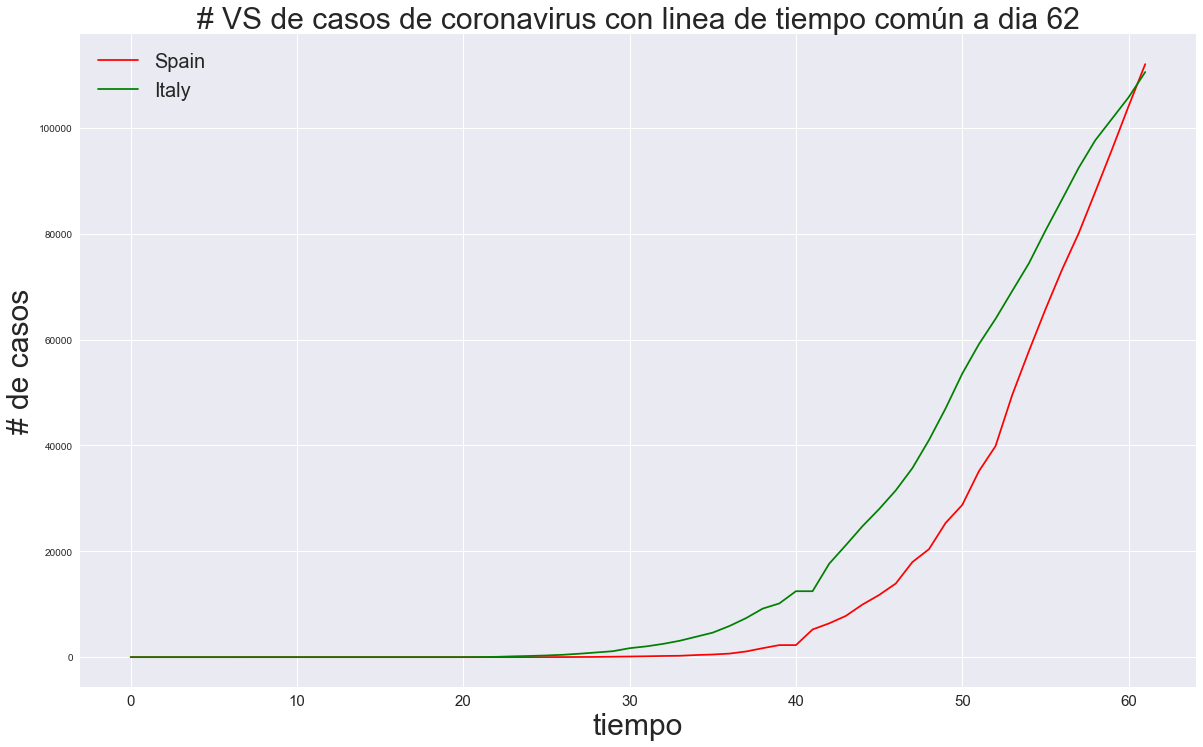

In [122]:
plt.figure(figsize=(20, 12))
plt.plot(limpio1, color='r')
plt.plot(limpio2, color='green')
plt.legend([pais_elegido, pais_versus], loc='best', fontsize=20)
plt.title('# VS de casos de coronavirus con linea de tiempo común a dia {}'.format(len(limpio1)), size=30)
plt.xlabel('tiempo', size=30)
plt.ylabel('# de casos', size=30)
plt.xticks(size=15)
plt.show()

In [123]:

esp_mortality_rate = []

# totalizamos en un array los ratios
for i in range(len(esp_total_deaths)):
    if (esp_confirmed_y[i] == 0):
        esp_mortality_rate.append(0)
    else:    
        esp_mortality_rate.append(esp_total_deaths[i]/esp_confirmed_y[i])


In [124]:
esp_tasa_crecimiento = []

for i in range(len(esp_confirmed_y)):
    if i>0 :
        esp_tasa_crecimiento.append (esp_confirmed_y[i]-esp_confirmed_y[i-1])
    else :
        esp_tasa_crecimiento.append(0)

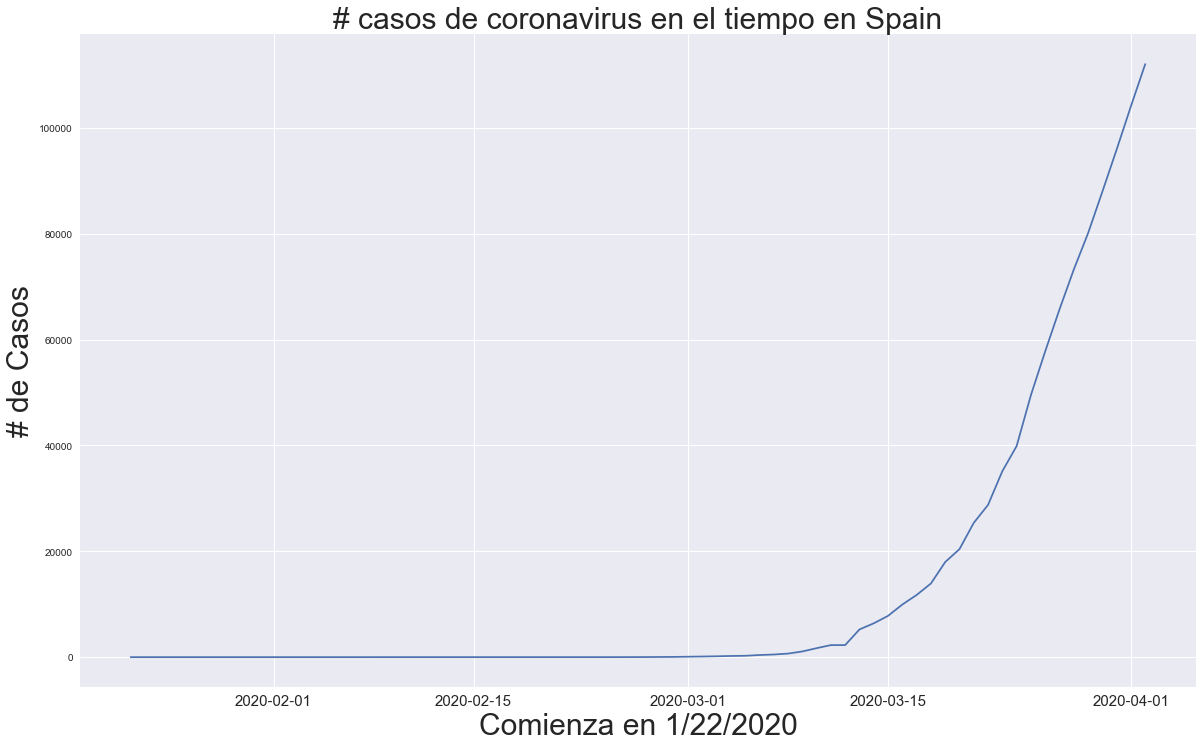

In [125]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_confirmed_y)
plt.title('# casos de coronavirus en el tiempo en {}'.format(pais_elegido), size=30)
plt.xlabel('Comienza en 1/22/2020', size=30)
plt.ylabel('# de Casos', size=30)
plt.xticks(size=15)
plt.show()

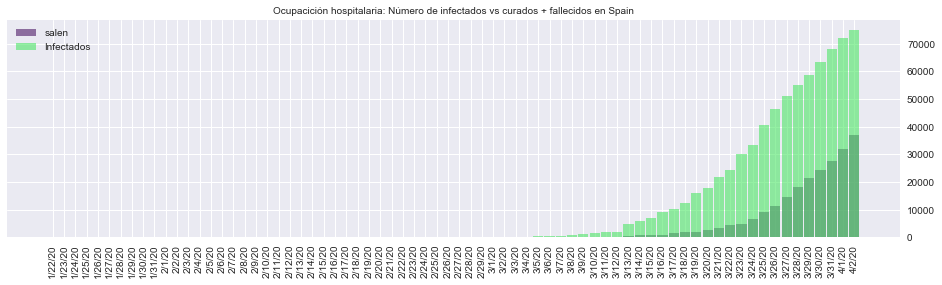

In [126]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
plt.title('Ocupacición hospitalaria: Número de infectados vs curados + fallecidos en {}'.format(pais_elegido), size=10)
plt.bar( col_fechas_ind, np.ndarray.tolist(esp_outers),width = 0.9, color = (0.3,0.1,0.4,0.6), label='salen')
plt.bar( col_fechas_ind, np.ndarray.tolist(esp_occupancy),width = 0.9, color = (0.3,0.9,0.4,0.6), label='Infectados')
plt.xticks(size=10, rotation=90)


plt.legend()

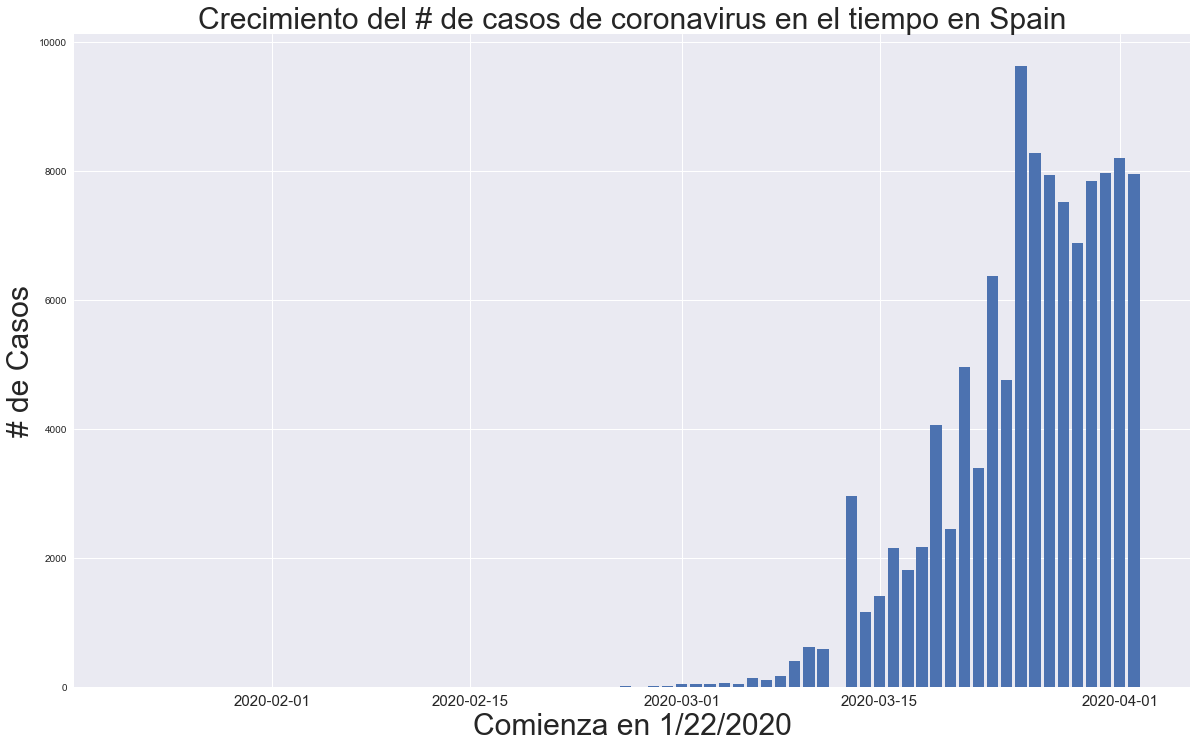

In [127]:
plt.figure(figsize=(20, 12))
plt.bar(x_values, esp_tasa_crecimiento)
plt.title('Crecimiento del # de casos de coronavirus en el tiempo en {}'.format(pais_elegido), size=30)
plt.xlabel('Comienza en 1/22/2020', size=30)
plt.ylabel('# de Casos', size=30)
plt.xticks(size=15)
plt.show()

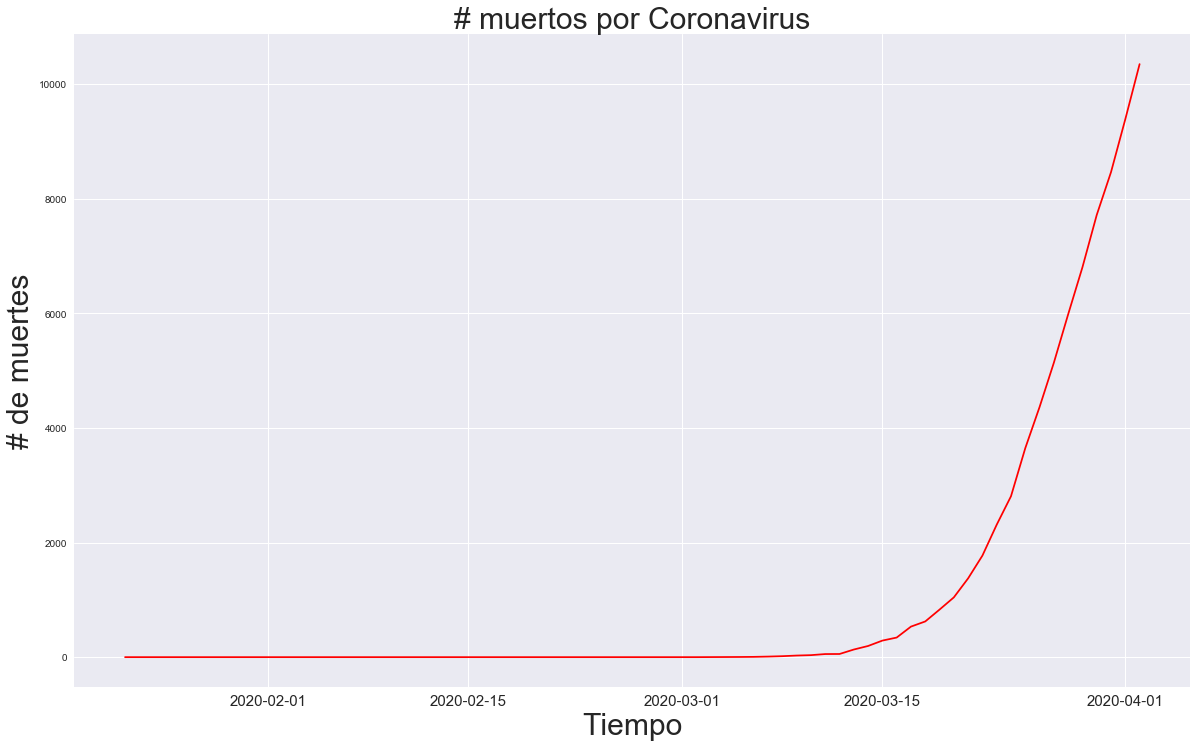

In [128]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_total_deaths, color='red')
plt.title('# muertos por Coronavirus', size=30)
plt.xlabel('Tiempo', size=30)
plt.ylabel('# de muertes', size=30)
plt.xticks(size=15)
plt.show()

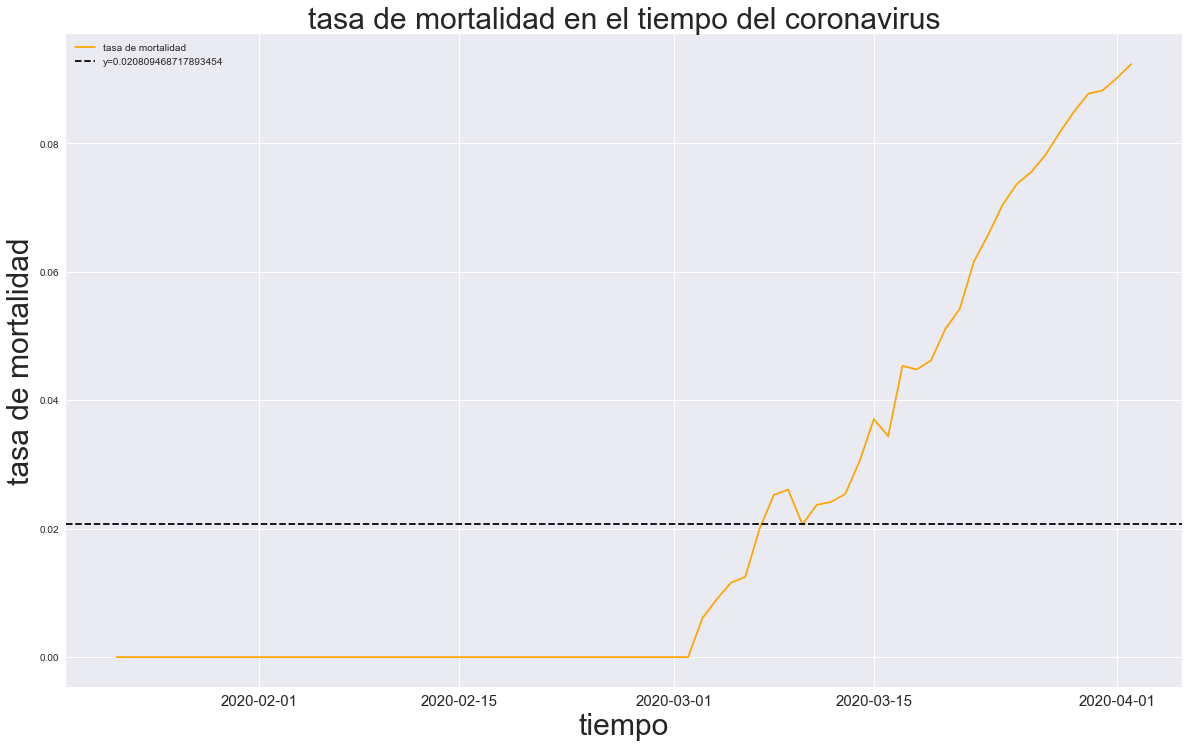

In [129]:
esp_mean_mortality_rate = np.mean(esp_mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_mortality_rate, color='orange')
plt.axhline(y = esp_mean_mortality_rate,linestyle='--', color='black')
plt.title('tasa de mortalidad en el tiempo del coronavirus', size=30)
plt.legend(['tasa de mortalidad', 'y='+str(esp_mean_mortality_rate)])
plt.xlabel('tiempo', size=30)
plt.ylabel('tasa de mortalidad', size=30)
plt.xticks(size=15)
plt.show()


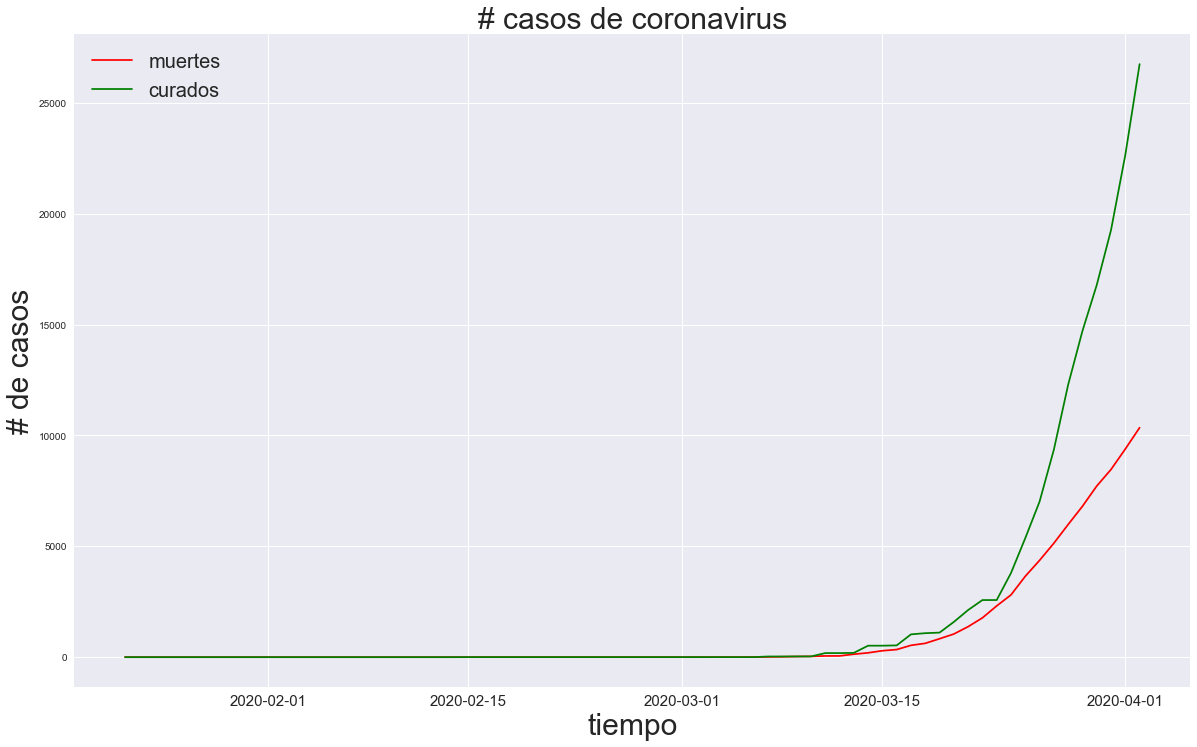

In [130]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, esp_total_deaths, color='r')
plt.plot(x_values, esp_total_recovery, color='green')
plt.legend(['muertes', 'curados'], loc='best', fontsize=20)
plt.title('# casos de coronavirus', size=30)
plt.xlabel('tiempo', size=30)
plt.ylabel('# de casos', size=30)
plt.xticks(size=15)
plt.show()


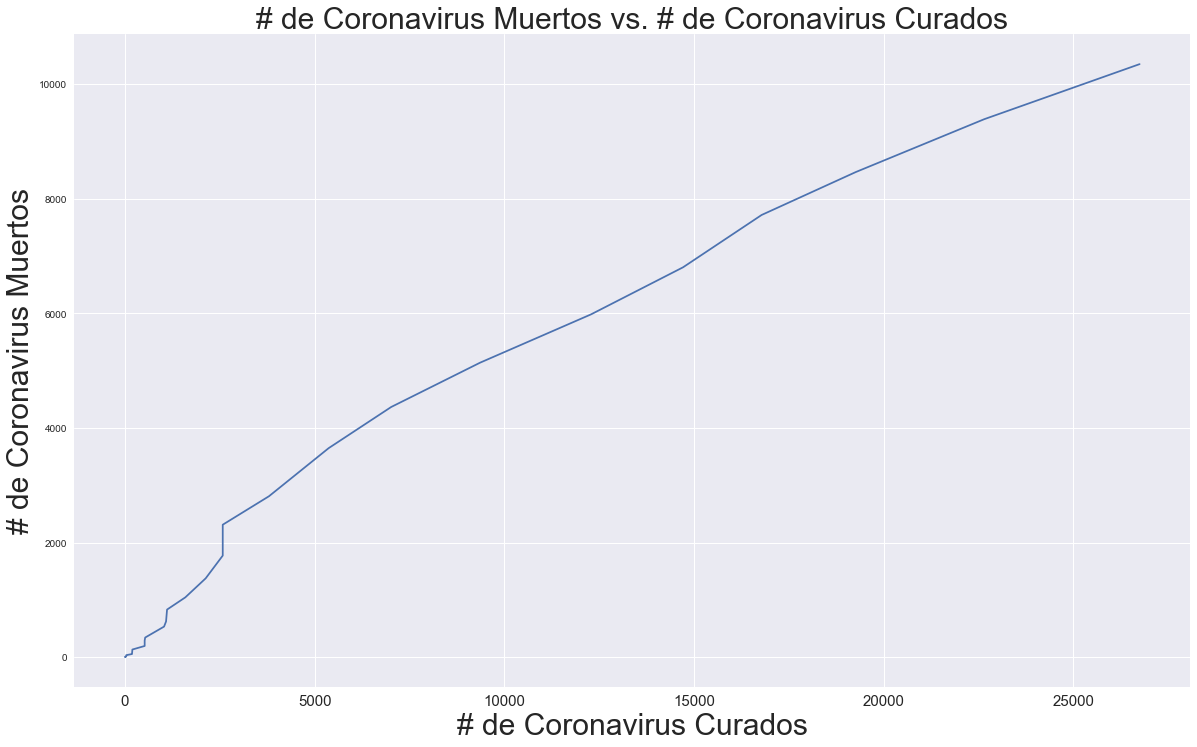

In [131]:
plt.figure(figsize=(20, 12))
plt.plot(esp_total_recovery, esp_total_deaths)
plt.title('# de Coronavirus Muertos vs. # de Coronavirus Curados', size=30)
plt.xlabel('# de Coronavirus Curados', size=30)
plt.ylabel('# de Coronavirus Muertos', size=30)
plt.xticks(size=15)
plt.show()

# Estudio global

Me quedo con los datos numéricos nada más, asi que cojo solo las col_fechas_ind.

In [132]:
confirmed = confirmed_df.loc[:, col_fechas_ind]
deaths = deaths_df.loc[:, col_fechas_ind]
recoveries = recoveries_df.loc[:, col_fechas_ind]

Creamos arrays  con todo

In [133]:
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

# totalizamos en un array los resultados
for i in col_fechas_ind:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)


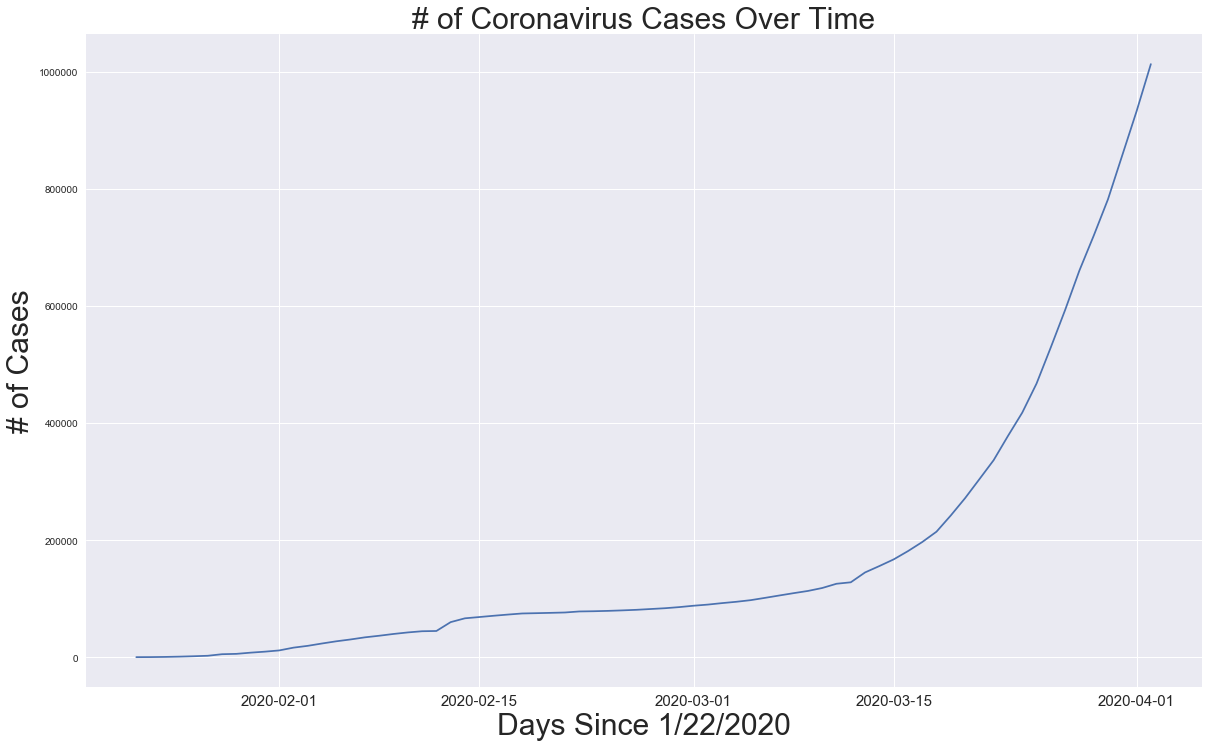

In [134]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()

Representaremos el númerode casos confirmados, recuperaciones, muertes y ratio de mortalidad a través del tiempo.

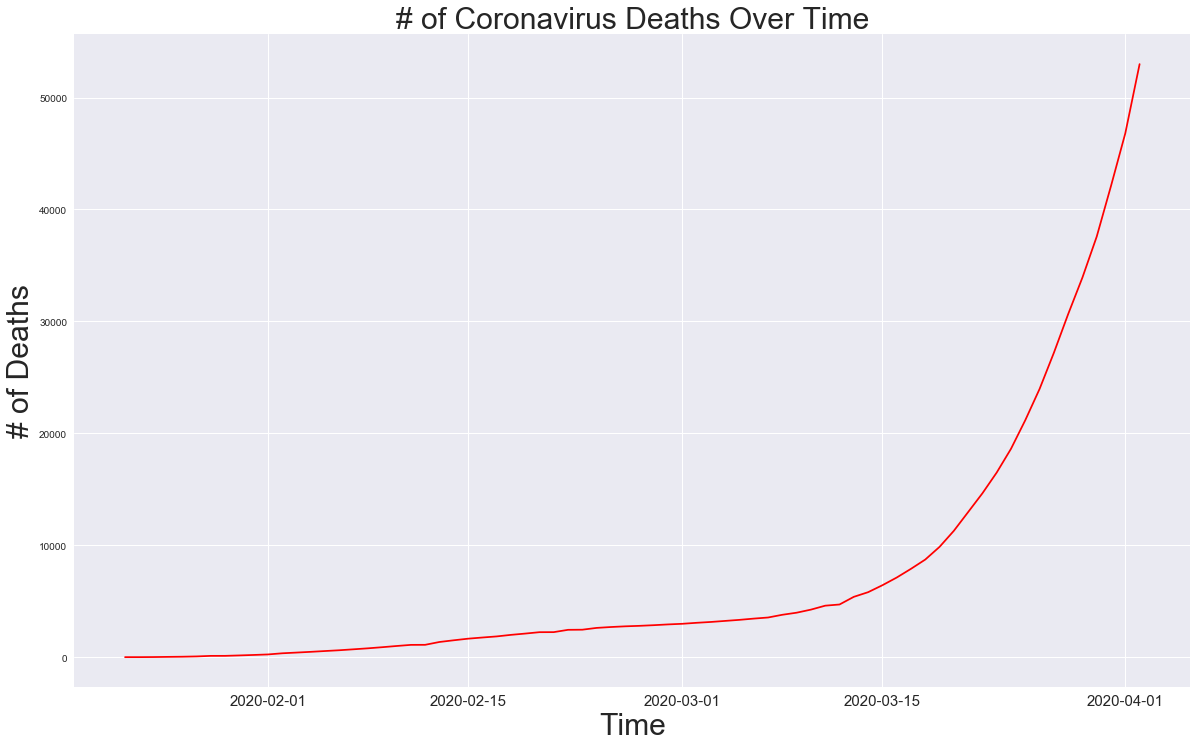

In [135]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, total_deaths, color='red')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Deaths', size=30)
plt.xticks(size=15)
plt.show()

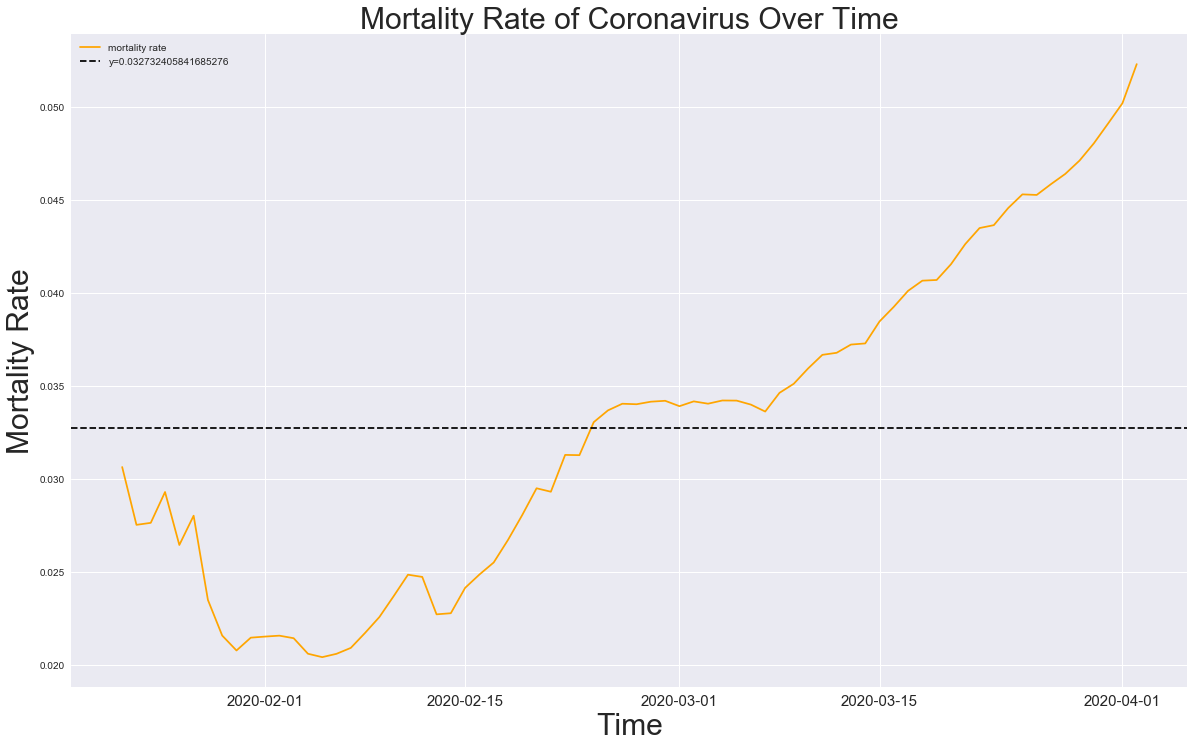

In [136]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(x_values, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=15)
plt.show()

Graphing the number of deaths and the number of recoveries

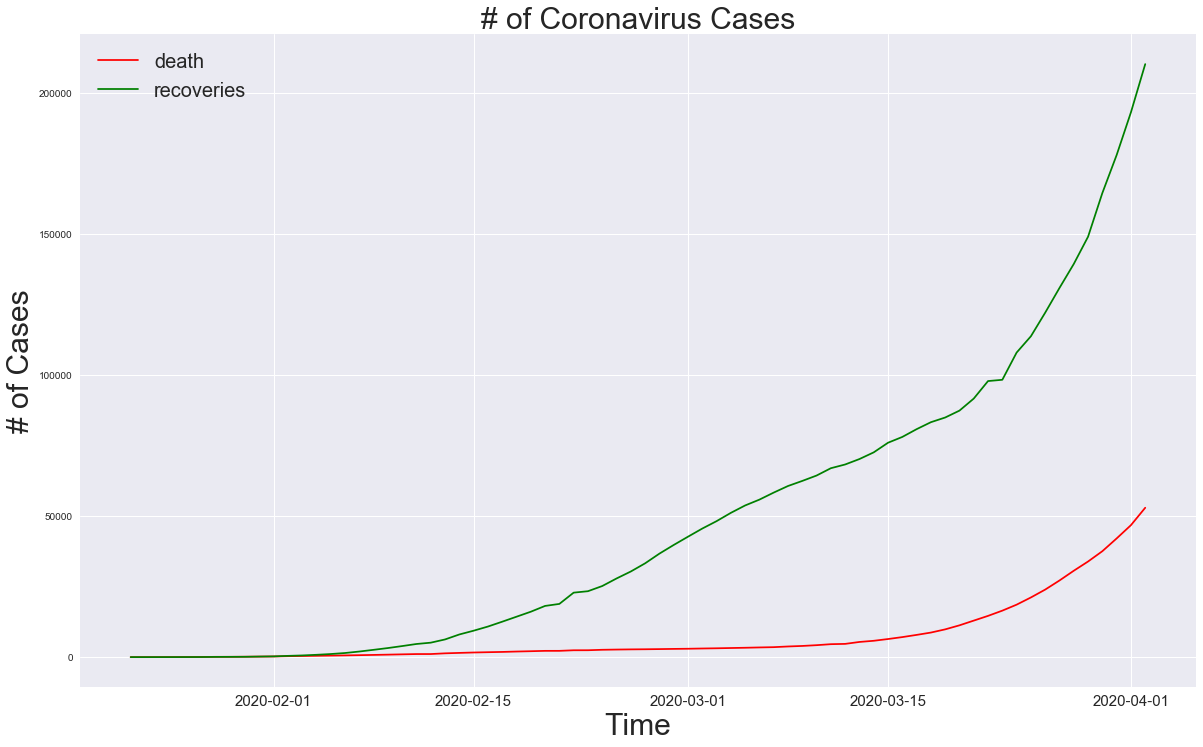

In [137]:
plt.figure(figsize=(20, 12))
plt.plot(x_values, total_deaths, color='r')
plt.plot(x_values, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=15)
plt.show()





Plotting deaths vs recoveries

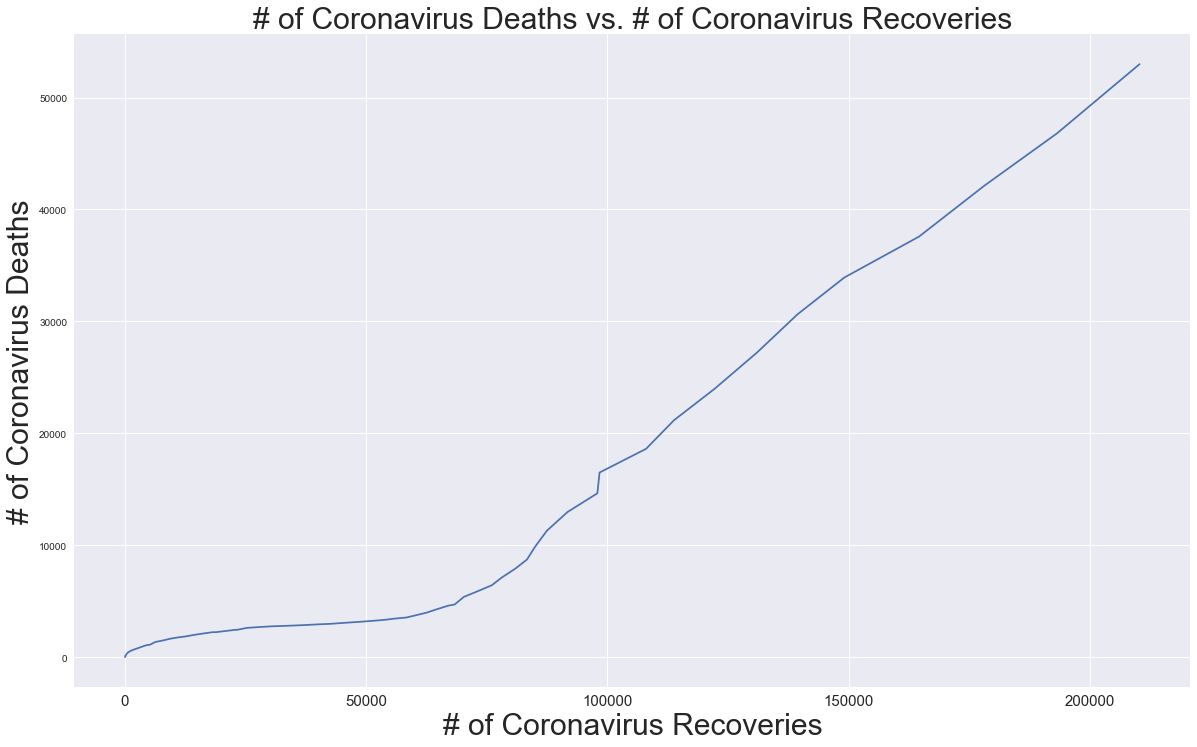

In [138]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [139]:
latest_confirmed = confirmed_df[col_fechas_ind[-1]]
latest_deaths = deaths_df[col_fechas_ind[-1]]
latest_recoveries = recoveries_df[col_fechas_ind[-1]]

Getting information about countries/regions that have confirmed coronavirus cases

In [140]:
unique_countries =  list(confirmed_df['Country/Region'].unique())

In [141]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_confirmed[confirmed_df['Country/Region']==unique_countries[i]].sum()

In [142]:
# number of cases per country/region
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}: {country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
US: 243453 cases
Italy: 115242 cases
Spain: 112065 cases
Germany: 84794 cases
China: 82432 cases
France: 59929 cases
Iran: 50468 cases
United Kingdom: 34173 cases
Switzerland: 18827 cases
Turkey: 18135 cases
Belgium: 15348 cases
Netherlands: 14788 cases
Canada: 11284 cases
Austria: 11129 cases
Korea, South: 9976 cases
Portugal: 9034 cases
Brazil: 8044 cases
Israel: 6857 cases
Sweden: 5568 cases
Norway: 5147 cases
Australia: 5116 cases
Czechia: 3858 cases
Ireland: 3849 cases
Denmark: 3573 cases
Russia: 3548 cases
Chile: 3404 cases
Ecuador: 3163 cases
Malaysia: 3116 cases
Poland: 2946 cases
Romania: 2738 cases
Philippines: 2633 cases
India: 2543 cases
Japan: 2495 cases
Luxembourg: 2487 cases
Pakistan: 2421 cases
Saudi Arabia: 1885 cases
Thailand: 1875 cases
Indonesia: 1790 cases
Greece: 1544 cases
Finland: 1518 cases
South Africa: 1462 cases
Peru: 1414 cases
Dominican Republic: 1380 cases
Mexico: 1378 cases
Iceland: 1319 cases
Panama: 1317 cases
Serb

In [143]:
unique_provinces =  list(confirmed_df['Province/State'].unique())
# those are countries, which are not provinces/states.
outliers = ['United Kingdom', 'Denmark', 'France']
for i in outliers:
    unique_provinces.remove(i)

ValueError: list.remove(x): x not in list

### Actualizando los datos
Con los últimos datos presentes preparamos varias gráficas agrupadas

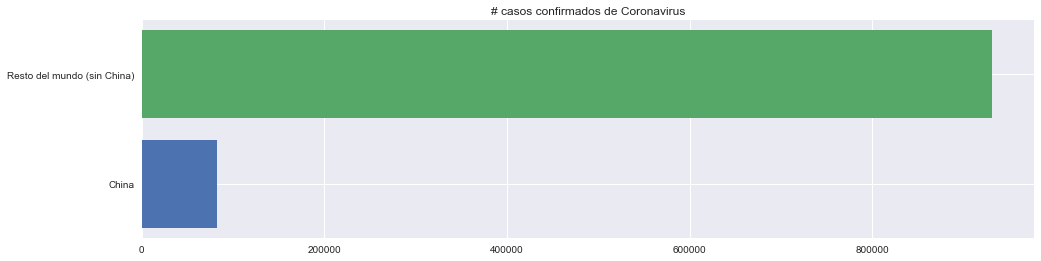

In [144]:
china_confirmed = latest_confirmed[confirmed_df['Country/Region']=='China'].sum()
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
plt.figure(figsize=(16, 4))
plt.barh('China', china_confirmed)
plt.barh('Resto del mundo (sin China)', outside_mainland_china_confirmed)
plt.title('# casos confirmados de Coronavirus')
plt.show()


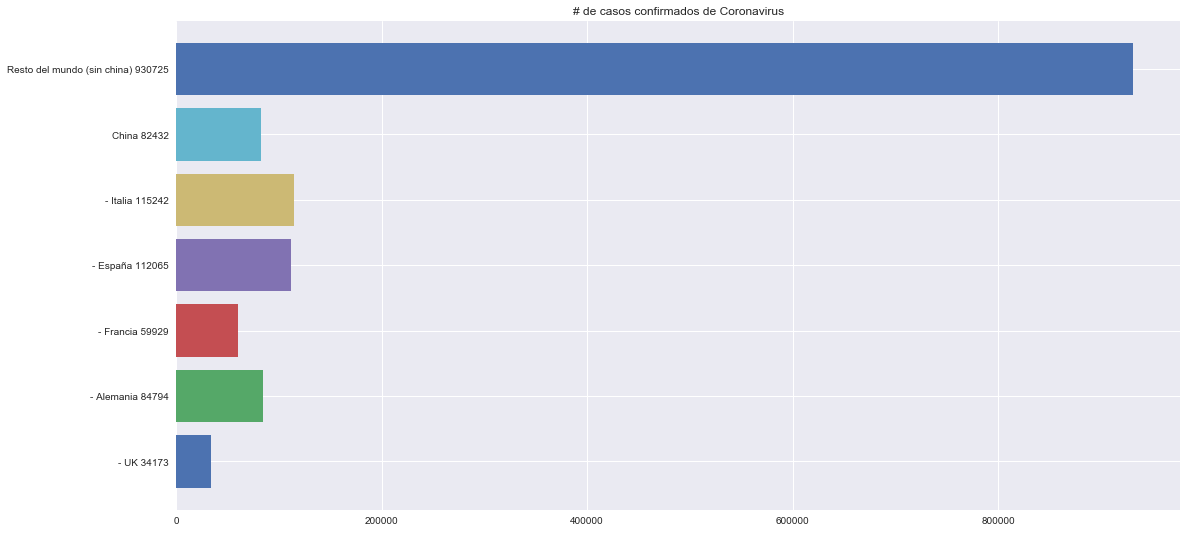

In [145]:
outside_mainland_china_confirmed = np.sum(country_confirmed_cases) - china_confirmed
spain_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Spain'].sum()
italy_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Italy'].sum()
germany_confirmed = latest_confirmed[confirmed_df['Country/Region']=='Germany'].sum()
france_confirmed = latest_confirmed[confirmed_df['Country/Region']=='France'].sum()
united_kingdom_confirmed = latest_confirmed[confirmed_df['Country/Region']=='United Kingdom'].sum()
plt.figure(figsize=(18, 9))

plt.barh('- UK {}'.format(united_kingdom_confirmed),united_kingdom_confirmed)
plt.barh('- Alemania {}'.format(germany_confirmed), germany_confirmed)
plt.barh('- Francia {}'.format(france_confirmed), france_confirmed)
plt.barh('- España {}'.format(spain_confirmed), spain_confirmed)
plt.barh('- Italia {}'.format(italy_confirmed), italy_confirmed)
plt.barh('China {}'.format(china_confirmed), china_confirmed)
plt.barh('Resto del mundo (sin china) {}'.format(outside_mainland_china_confirmed), outside_mainland_china_confirmed)

plt.title('# de casos confirmados de Coronavirus')
plt.show()

## Representaciones visuales para el mundo (barras y tartas)

In [146]:
# Mostramos los diez mayores, resto agrupamos
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

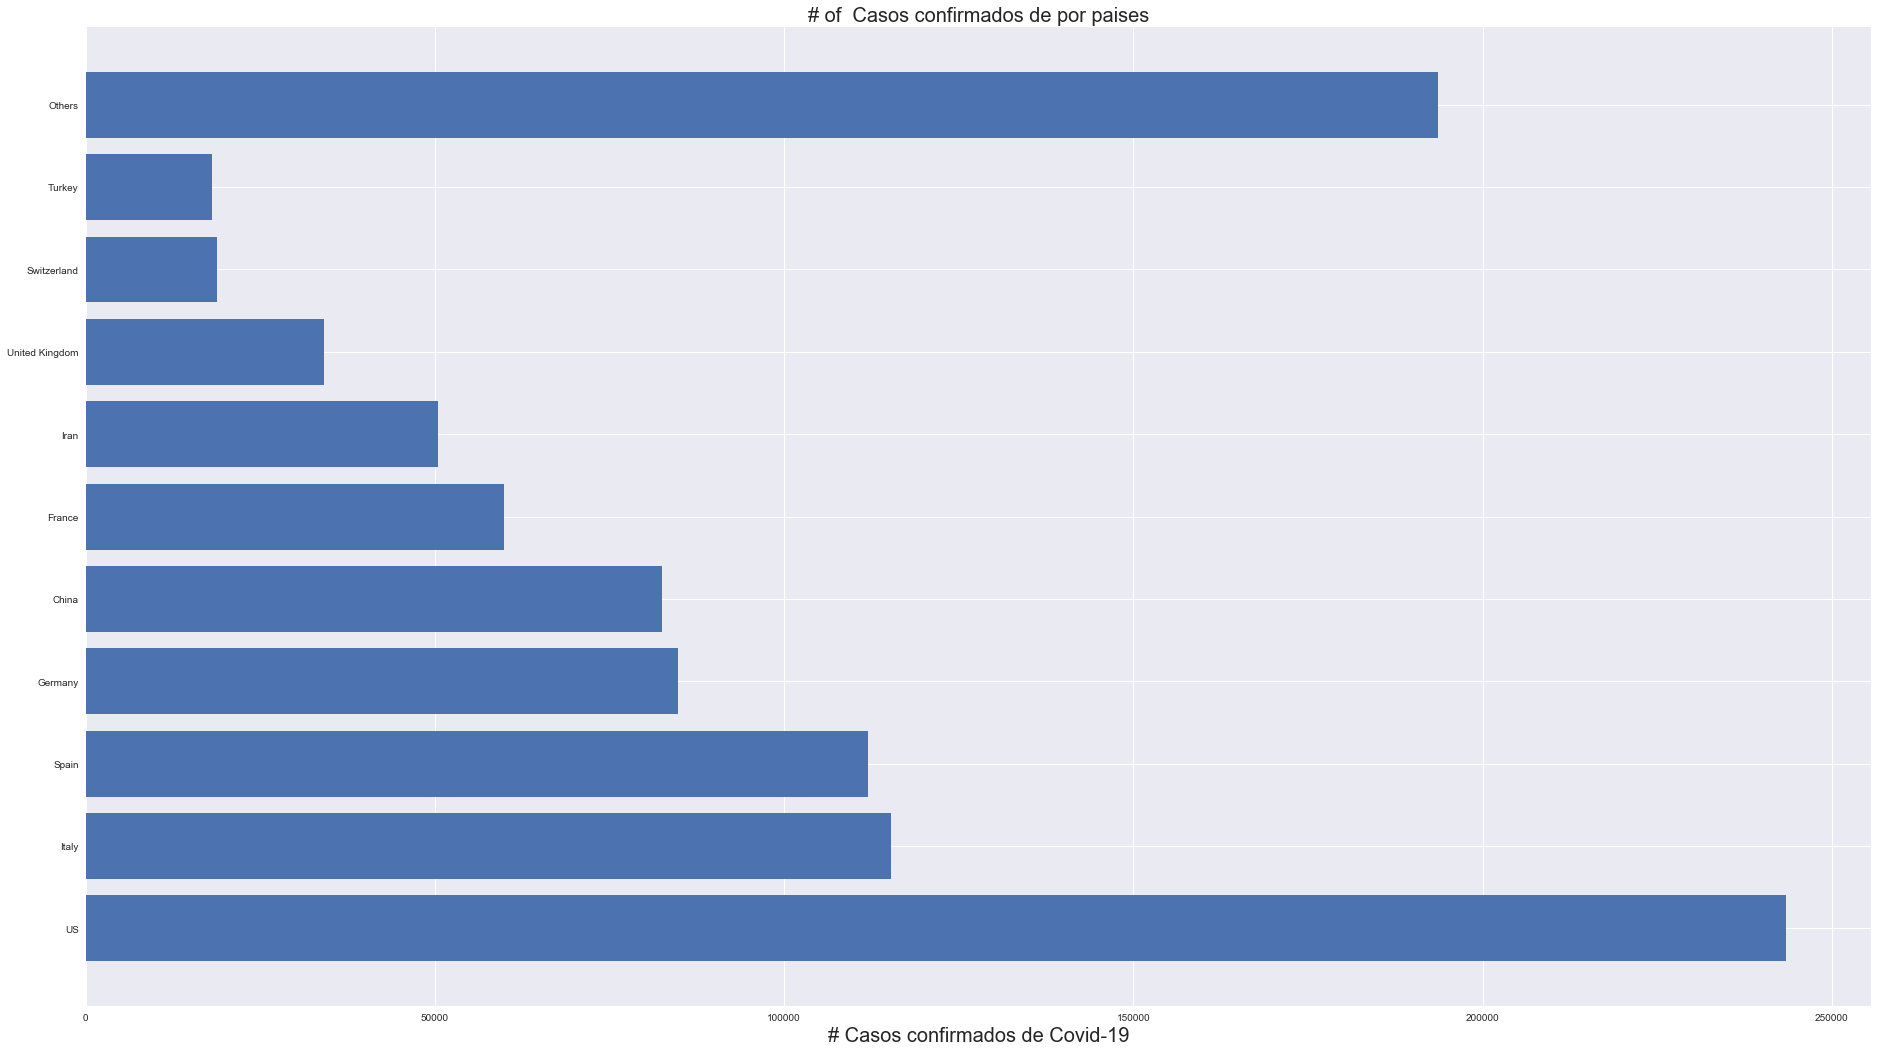

In [147]:
plt.figure(figsize=(32, 18))
plt.barh(visual_unique_countries, visual_confirmed_cases)
plt.title('# of  Casos confirmados de por paises', size=20)
plt.xlabel('# Casos confirmados de Covid-19', size=20)
plt.show()

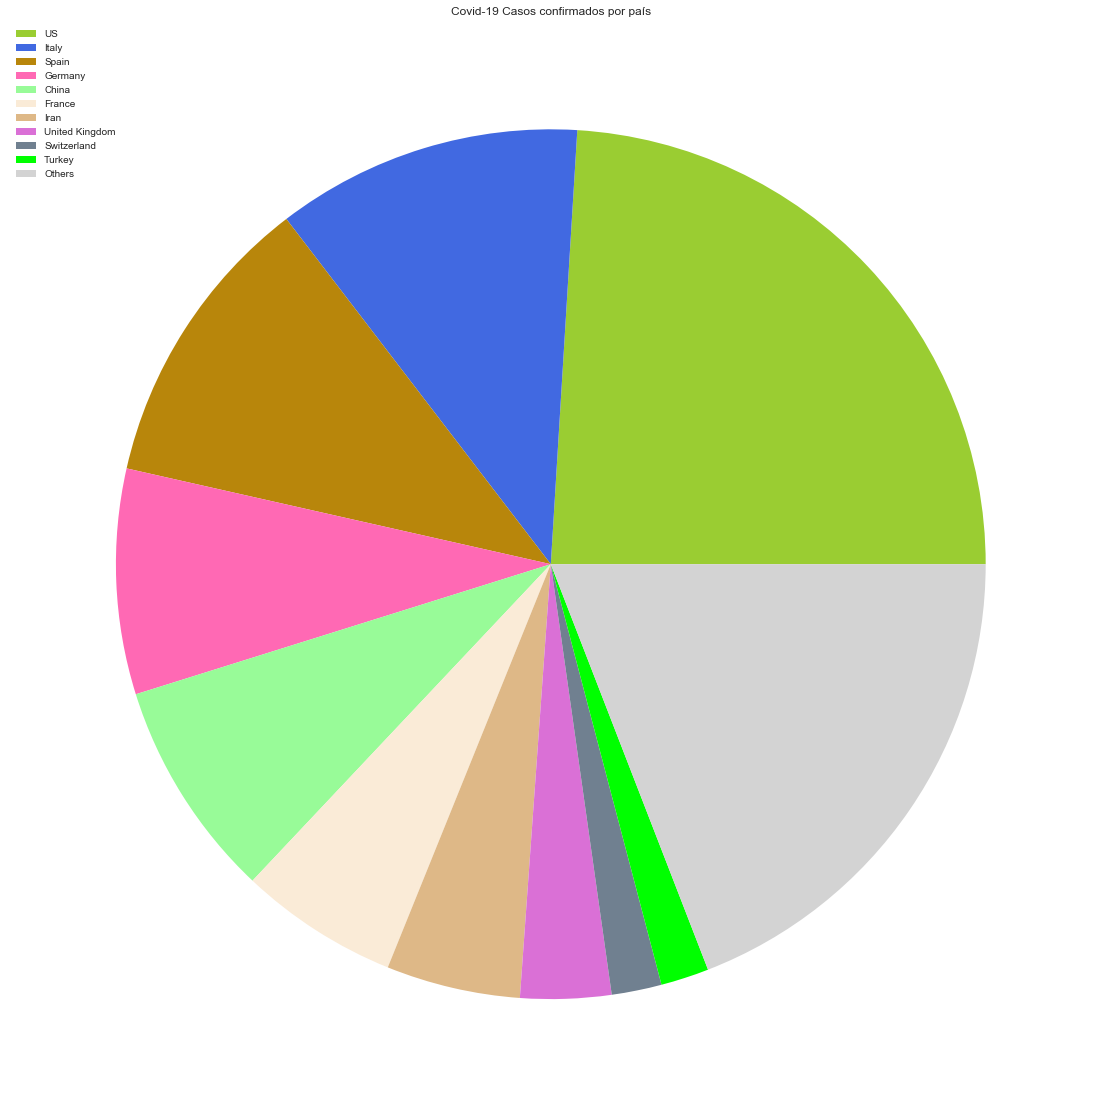

In [148]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados por país')
plt.pie(visual_confirmed_cases, colors=c)
plt.legend(visual_unique_countries, loc='best')
plt.show()

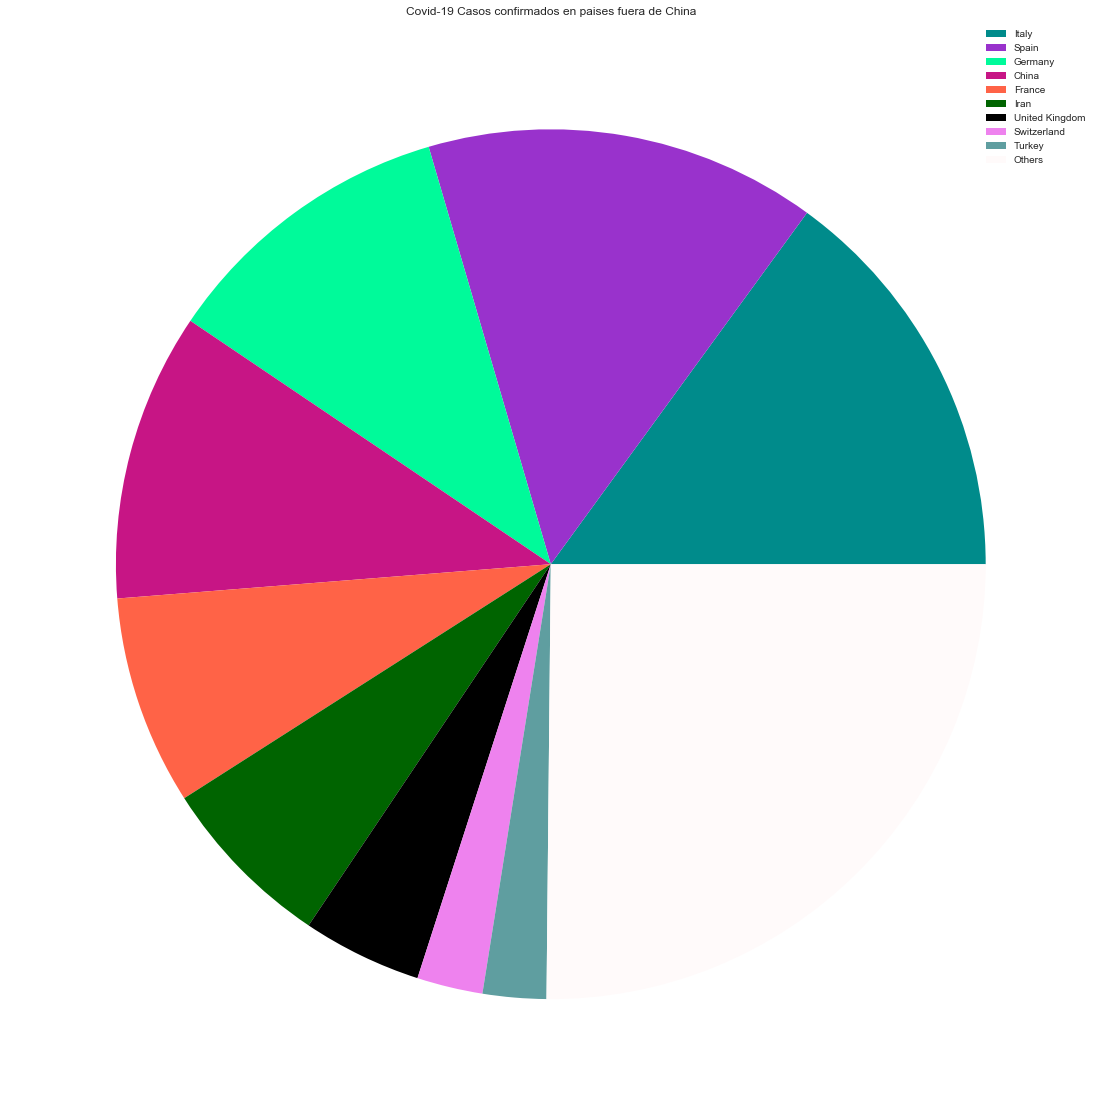

In [149]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados en paises fuera de China')
plt.pie(visual_confirmed_cases[1:], colors=c)
plt.legend(visual_unique_countries[1:], loc='best')
plt.show()

In [150]:
us_regions = list(confirmed_df[confirmed_df['Country/Region']=='US']['Province/State'].unique())
us_confirmed_cases = []
no_cases = [] 
for i in us_regions:
    cases = latest_confirmed[confirmed_df['Province/State']==i].sum()
    if cases > 0:
        us_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    us_regions.remove(i)

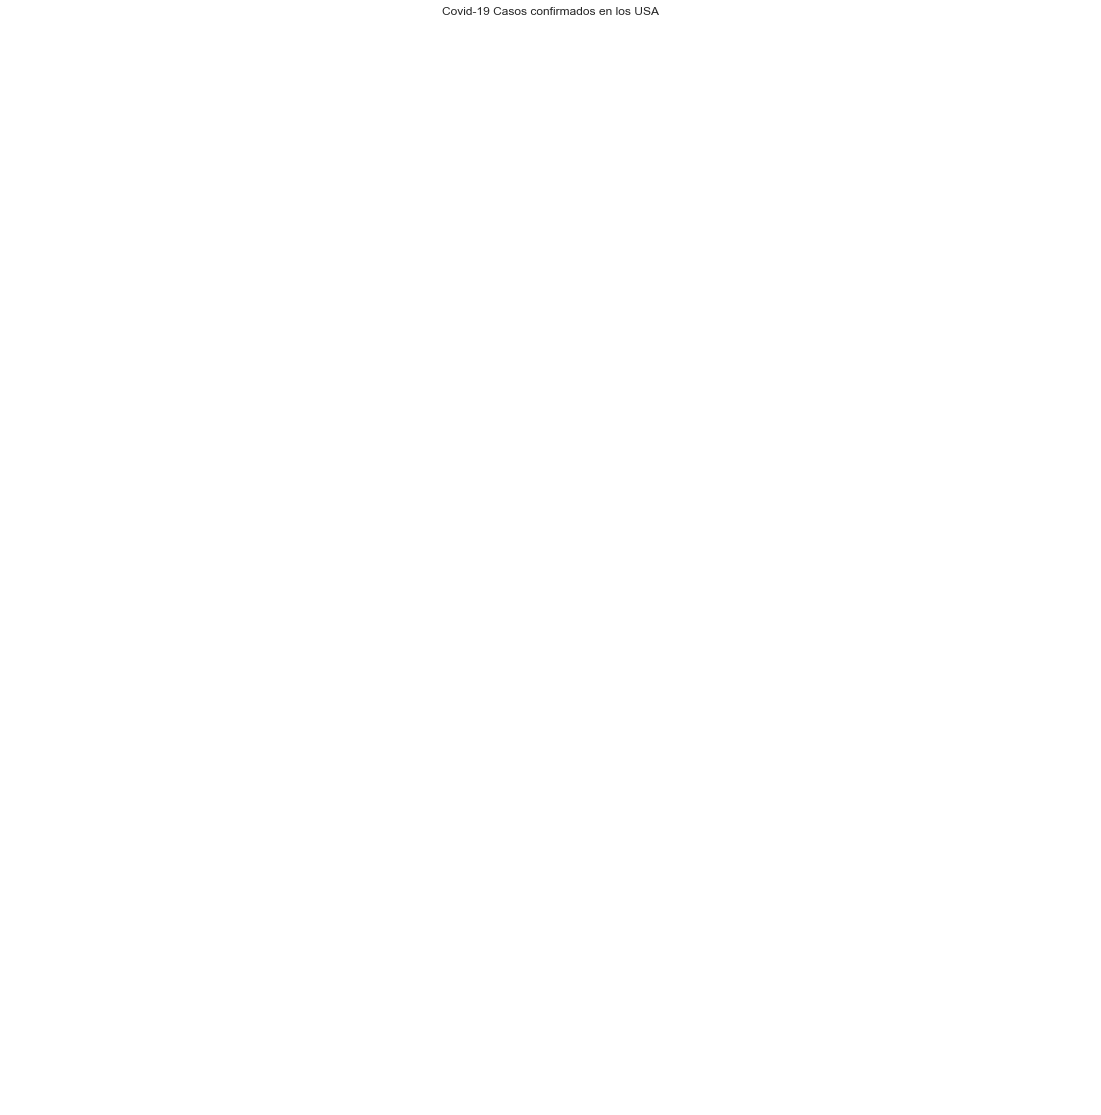

In [151]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Casos confirmados en los USA')
plt.pie(us_confirmed_cases, colors=c)
plt.legend(us_regions, loc='best')
plt.show()